# Vamos a ver

- Herramientas de limpieza
- Como transformar variables numericas a categoricas y categoricas a numericas (dummy)
- timestamp

## Limpieza

- replace(): ver documentacion, hay muchas opciones https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
- zip(): extra
- rename()

## Categorias

- cut()
- Categorical: Son unicas, pueden estar ordenadas y tienen algunos metodos comodos como renombrar masivamente https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
- map()
- pd.get_dummies()

# Fechas (vamos a empezar con esto)

- datetime
- timestamp

# Unix Timestamp

### Problemas comunes con los datos de tipo timestamp o datetime

Las fechas se guardan como valores numericos, pero hay que definir un monton de cosas arbitrarias:

  1. No esta clara la zona horaria (pueden ser naive o aware). referencia geografica. Mostra [mapa](https://es.wikipedia.org/wiki/Tiempo_universal_coordinado#/media/Archivo:World_Time_Zones_Map.png)
  2. No esta claro desde cuando se cuentan. Referencia temporal cero.
  3. No esta claro como se cuentan. Que dia es el primero de la semana? Lunes, Domingo? Se empieza en 1 o en 0? Que es la primer semana de un año?
  4. No esta claro las convenciones de lenguaje. Que fecha es 06/05/12? Es 6 de mayo de 1912? es 5 de julio de 2012?
  5. ¿Como hago para adaptar los print al idioma o convencion local?

De todo esto se encarga la libreria datetime. Esta libreria esta incluida en numpy y en pandas, pero en pandas tiene algunas diferencias tecnicas para que pueda servir de indice, por eso se llama timestamp. 

### Como se solucionan los problemas

1. Las fechas por default no tienen zona horaria, son naive, pero se les puede agregar con la informacion timezone que permite representar la informacion de la zona horaria como una propiedad de la fecha. En este caso se dice que es una fecha conciente (aware). Sino asume que esta en el uso horario local.
2. Las fecha se guardan como el numero de segundos que transcurrieron desde el 1ero de Enero de 1970 (en grenwich). Son el numero de segundos desde ese momento. El resto es adaptaciones de formato que hace la libreria.
3. Hay convenciones. En general se toma la fecha como segundos, horas, dias, meses y años. Pero hay metodos que permiten cuantificar de otras maneras, por ejemplo en semanas. Hay mas de un formato y depende que metodo usemos como representa la informacion, pero el numero es siempre el mismo.
4. Lo mismo que el punto anterior. Segun que metodos usemos podemos usar una convencion u otra. Hay metodos que permiten configurar formatos a medida y hay metodos que recuperan las convenciones de la configuracion local sel sistema operativo. 
5. Lo mismo.

### Principales tipos de fechas (tienen diferentes metodos)

- period / timedelta : Representa un tiempo transcurrido, es una diferencia entre dos fechas. Guarda la cantidad de dias, segundos y microsegundos, y tiene todos los metodos usuales para representar esa informacion. Es util cuando se quiere hacer operaciones entre tiempos. Como sumar, restar, comparar, o hacer intervalos periodicos. 
- time : Esta pensado para representar tiempos menores a un dia, tiene los metodos asociados.
- date : Esta pensado para representar las fechas en funcion de los dias desde 01/01/1970. Tiene los metodos asociados.
- timedate : combina toda la informacion de una fecha, es el equivalente a timestamp de pandas.
- timezone : sirve para manipular la informacion de la zona horaria.

  - Convenciones de formato de fechas: https://strftime.org/
  - Documentacion completa en español: https://docs.python.org/es/3/library/datetime.html




In [1]:
from datetime import datetime

t = datetime.now()
# t
print (datetime.now().timestamp())
datetime.now().ctime()
datetime.now().isoformat()

1642704331.369419


'2022-01-20T15:45:31.370419'

In [2]:
import pytz
from datetime import datetime, timezone

t = datetime.now()
print (t)
t_a = datetime.now(pytz.timezone('America/Argentina/Buenos_Aires'))
print (t_a)
# Mostrar Colab

# Todas las computadoras dan el mismo timestamp lo que cambia entre una timestamp naive y uno aware es si el string se representa en el uso local o en otro especificado.

print (t.timestamp())
print (t_a.timestamp())

2022-01-20 15:45:31.424424
2022-01-20 15:45:31.516429-03:00
1642704331.424424
1642704331.516429


In [3]:
import pandas as pd
t = pd.Timestamp.now() # pytz.timezone('America/Argentina/Buenos_Aires'))
print (t)
t.year
t.month
t.month_name()
t.utcnow()
t.hour
t.week
t.ctime()
t.strftime("%H:%H") # Variar ejemplos
t.isocalendar() # Es tipo calendario, año, semana, dia de la semana
t.isoformat()
# Ver mas en https://strftime.org/ y https://docs.python.org/3/library/datetime.html#datetime.date.strftime

2022-01-20 15:45:32.180479


'2022-01-20T15:45:32.180479'

In [4]:
# Vamos a crear una columna con fechas en formatos diversos

fechas_str = ["01/03/11","11/2/2001","1-4-2001","110101","01Jan2001"]
data = pd.DataFrame({"Fechas Str":fechas_str})
data.head()
data["Fechas"] = pd.to_datetime(data["Fechas Str"])
data["mes"] = data["Fechas"].apply(lambda x: x.month_name())
display (data.head())

,Fechas Str,Fechas,mes
0,01/03/11,2011-01-03,January
1,11/2/2001,2001-11-02,November
2,1-4-2001,2001-01-04,January
3,110101,2001-11-01,November
4,01Jan2001,2001-01-01,January


In [5]:
# Tambien podemos forzar el formato

print (pd.to_datetime('170901 100500', format='%y%d%m %H%M%S'))
print (pd.to_datetime('20170109 100500-10:30', format='%Y%m%d %H%M%S%z'))
print (pd.to_datetime('170901 100500', format='%y%d%m %H%M%S').timestamp())
print (pd.to_datetime('20170109 100500-10:30', format='%Y%m%d %H%M%S%z').timestamp())


2017-01-09 10:05:00
2017-01-09 10:05:00-10:30
1483956300.0
1483994100.0


# Discretizacion con pandas

### Problemas comunes con los datos de tipo timestamp o datetime

Las fechas se guardan como valores numericos, pero hay que definir un monton de cosas arbitrarias:

  1. No esta clara la zona horaria (pueden ser naive o aware). referencia geografica. Mostra [mapa](https://es.wikipedia.org/wiki/Tiempo_universal_coordinado#/media/Archivo:World_Time_Zones_Map.png)
  2. No esta claro desde cuando se cuentan. Referencia temporal cero.
  3. No esta claro como se cuentan. Que dia es el primero de la semana? Lunes, Domingo? Se empieza en 1 o en 0? Que es la primer semana de un año?
  4. No esta claro las convenciones de lenguaje. Que fecha es 06/05/12? Es 6 de mayo de 1912? es 5 de julio de 2012?
  5. ¿Como hago para adaptar los print al idioma o convencion local?

De todo esto se encarga la libreria datetime. Esta libreria esta incluida en numpy y en pandas, pero en pandas tiene algunas diferencias tecnicas para que pueda servir de indice, por eso se llama timestamp. 

### Como se solucionan los problemas

1. Las fechas por default no tienen zona horaria, son naive, pero se les puede agregar con la informacion timezone que permite representar la informacion de la zona horaria como una propiedad de la fecha. En este caso se dice que es una fecha conciente (aware). Sino asume que se la quiere representar en la configuracion del sistema operativo. 
2. Las fecha se guardan como el numero de segundos que transcurrieron desde el 1ero de Enero de 1970 (en grenwich). Son el numero de segundos desde ese momento. El resto es adaptaciones de formato que hace la libreria.
3. Hay convenciones. En general se toma la fecha como segundos, horas, dias, meses y años. Pero hay metodos que permiten cuantificar de otras maneras, por ejemplo en semanas. Hay mas de un formato y depende que metodo usemos como representa la informacion, pero el numero es siempre el mismo.
4. Lo mismo que el punto anterior. Segun que metodos usemos podemos usar una convencion u otra. Hay metodos que permiten configurar formatos a medida y hay metodos que recuperan las convenciones de la configuracion local sel sistema operativo. 
5. Lo mismo.

### Principales tipos de fechas (tienen diferentes metodos)

- period / timedelta : Representa un tiempo transcurrido, es una diferencia entre dos fechas. Guarda la cantidad de dias, segundos y microsegundos, y tiene todos los metodos usuales para representar esa informacion. Es util cuando se quiere hacer operaciones entre tiempos. Como sumar, restar, comparar, o hacer intervalos periodicos. 
- time : Esta pensado para representar tiempos menores a un dia, tiene los metodos asociados.
- date : Esta pensado para representar las fechas en funcion de los dias desde 01/01/1970. Tiene los metodos asociados.
- timedate : combina toda la informacion de una fecha, es el equivalente a timestamp de pandas.
- timezone : sirve para manipular la informacion de la zona horaria.

  - Convenciones de formato de fechas: https://strftime.org/
  - Documentacion completa en español: https://docs.python.org/es/3/library/datetime.html




In [6]:
# Importamos las librerias

import numpy as np
import pandas as pd

In [7]:
# Generamos un dataset ficticio.

Mal = 2
Regular = 4
Bien = 7
Muy_Bien = 9
Excelente = 10

notas = np.random.randint(0,1000,80)/100  # Generamos enteros entre 0 y 10 ochenta veces
data = pd.DataFrame({"Notas":notas})
data.head(10)

,Notas
0,4.02
1,0.96
2,6.89
3,2.01
4,0.04
5,7.93
6,6.20
7,6.77
8,5.08
9,9.95


In [8]:
# Vamos a tratar de resolver la primer parte.
# Para eso queremos convertir una variable numerica en una categorica con rangos preestablecidos. La funcion pd.cut hace eso, pero necesita saber los bins
bins = [0, Mal, Regular, Bien, Muy_Bien, Excelente] # Recordar que ya definimos que es Mal, Bien, etc.
# Vamos a generar etiquetas (strings) que se correspondan a esas categorias
group_labels = ["Mal","Regular","Bien","Muy Bien","Excelente"]

Notas_categorizadas = pd.cut(data["Notas"], bins, right=False , labels=group_labels) # , right=False , labels=group_labels
print (Notas_categorizadas.value_counts())
data["Categorias"] = Notas_categorizadas
data.head(10)

Bien         31
Muy Bien     18
Regular      13
Mal           9
Excelente     9
Name: Notas, dtype: int64


,Notas,Categorias
0,4.02,Bien
1,0.96,Mal
2,6.89,Bien
3,2.01,Regular
4,0.04,Mal
5,7.93,Muy Bien
6,6.20,Bien
7,6.77,Bien
8,5.08,Bien
9,9.95,Excelente


In [9]:
# Ahora queremos transformar la categorias con el criterio de aprobacion.
# Queremos agruparlas como aprobado y no aprobado.

# Para eso vamos a mapear (usar un diccionario para transformar valores)

dict_aprobacion = {"Mal":"Desaprobado","Regular":"Desaprobado","Bien":"Aprobado","Muy Bien":"Aprobado","Excelente":"Aprobado"}
data["Condicion"] = data["Categorias"].map(dict_aprobacion)
data.head(10)

,Notas,Categorias,Condicion
0,4.02,Bien,Aprobado
1,0.96,Mal,Desaprobado
2,6.89,Bien,Aprobado
3,2.01,Regular,Desaprobado
4,0.04,Mal,Desaprobado
5,7.93,Muy Bien,Aprobado
6,6.20,Bien,Aprobado
7,6.77,Bien,Aprobado
8,5.08,Bien,Aprobado
9,9.95,Excelente,Aprobado


In [10]:
# Generamos datos de ejemplo

datos = {
    "Candidato preferido": np.random.choice(["Candidato 1", "Candidato 2"], 1000, p=[0.45,0.55]),
    "Nivel_economico": np.random.choice(["Alto","Medio","Bajo"], 1000, p=[0.2,0.5,0.3]),
    "Nivel_educativo": np.random.choice(["Alto","Medio","Bajo"], 1000, p=[0.3,0.4,0.3]),
    "Comuna": np.random.choice(range(1,16),1000)
}

data = pd.DataFrame(datos)
data.head(10)

,Candidato preferido,Nivel_economico,Nivel_educativo,Comuna
0,Candidato 2,Bajo,Bajo,5
1,Candidato 1,Medio,Bajo,2
2,Candidato 2,Medio,Bajo,6
3,Candidato 1,Medio,Alto,4
4,Candidato 1,Medio,Medio,11
5,Candidato 2,Medio,Medio,10
6,Candidato 1,Medio,Alto,10
7,Candidato 1,Alto,Bajo,9
8,Candidato 2,Medio,Alto,6
9,Candidato 1,Medio,Alto,8


In [11]:
# Queremos que la info de la comuna se "desdoble" en 15 columnas que digan si pertenece o no a esa comuna

# Usamos la funcion get_dummies

one_hot = pd.get_dummies(data["Comuna"], prefix = "Comuna", drop_first = False) #, prefix = "Comuna", drop_first = False) # Mencionar la colinealidad
one_hot.head()
data = data.drop(["Comuna"],axis = 1)
data.join(one_hot)

#two_hot = pd.get_dummies(one_hot["Comuna_1"], prefix = "Comuna_1", drop_first = False)
#two_hot.head(15)

,Candidato preferido,Nivel_economico,Nivel_educativo,Comuna_1,Comuna_2,Comuna_3,Comuna_4,Comuna_5,Comuna_6,Comuna_7,Comuna_8,Comuna_9,Comuna_10,Comuna_11,Comuna_12,Comuna_13,Comuna_14,Comuna_15
0,Candidato 2,Bajo,Bajo,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Candidato 1,Medio,Bajo,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Candidato 2,Medio,Bajo,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Candidato 1,Medio,Alto,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Candidato 1,Medio,Medio,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Candidato 2,Medio,Medio,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
996,Candidato 2,Bajo,Alto,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
997,Candidato 2,Bajo,Medio,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
998,Candidato 1,Bajo,Medio,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Ejemplo de categorizacion con arbolado (vamos a repasar temas de la clase pasada)


In [12]:
# importamos las librerias y el dataset

import pandas as pd
import geopandas as gpd



# Descargamos y abrimos el archivo
comunas = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/comunas.csv")
arbolado = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")

In [13]:
import shapely.wkt
import matplotlib.pyplot as plt

#Trasnformamos la columna WKT
comunas["WKT"] = comunas["WKT"].apply(shapely.wkt.loads) 
geo_comunas = gpd.GeoDataFrame(comunas, geometry='WKT')
geo_arbolado = gpd.GeoDataFrame(arbolado,geometry=gpd.points_from_xy(arbolado.long, arbolado.lat))



<AxesSubplot:>

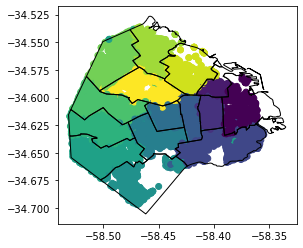

In [14]:
fig, ax = plt.subplots()

geo_arbolado.sample(10000).plot(ax=ax, column = "comuna")
geo_comunas.plot(ax=ax, facecolor="none", edgecolor='black')

# Propuesta

Queremos hacer un mapa que muestre la edad de los arboles, para eso vamos a usar el grosor del tronco como indicador de la edad, pero hay que tener en cuenta varias cosas:

- No tenemos una referencia absoluta, por eso vamos a considerar la edad en terminos relativos al grosor del tronco de dicha especie.
- Tenemos que generar categorias comunes para todas las especies donde cetegoricemos en terminos relativos a la especie.
- Tenemos especies con poca poblacion, eso lo queremos ignorar.

In [15]:
# Empecemos por filtrar los arboles de los que hay mas especimenes.

geo_arbolado["nombre_cientifico"].value_counts()

nro_minimo_especimenes = 1000

geo_arbolado_filtrado = geo_arbolado.groupby(["nombre_cientifico"]).filter(lambda grp: grp["nro_registro"].count()>nro_minimo_especimenes)

geo_arbolado_filtrado.dropna(subset=["diametro_altura_pecho"], inplace=True)

geo_arbolado_filtrado["nombre_cientifico"].value_counts()



Fraxinus pennsylvanica                 133532
Platanus x acerifolia                   32277
Ficus benjamina                         22491
Tilia x moltkei                         15595
Melia azedarach                         14901
Jacaranda mimosifolia                   13869
Lagerstroemia indica                    11884
Fraxinus americana                      10110
No identificado                          9386
Tipuana tipu                             9319
Ligustrum lucidum                        8952
Fraxinus excelsior                       8582
Ligustrum lucidum f. aureovariegata      7998
Liquidambar styraciflua                  5664
Acer negundo                             5167
Syagrus romanzoffiana                    3426
Styphnolobium japonicum                  2200
Tilia cordata                            2177
Persea americana                         1999
Robinia pseudoacacia                     1994
Ceiba speciosa                           1796
Citrus limon                      

In [16]:
geo_arbolado_filtrado["categoria_edad"] = geo_arbolado_filtrado.groupby(["nombre_cientifico"])['diametro_altura_pecho'].transform(lambda x: pd.qcut(x,5, labels=["joven","adulto_joven","adulto","adulto_viejo","viejo"]))

In [17]:
display (geo_arbolado_filtrado[geo_arbolado_filtrado["nombre_cientifico"]=="Tipuana tipu"].head(20))
display (geo_arbolado_filtrado[geo_arbolado_filtrado["nombre_cientifico"]=="Fraxinus pennsylvanica"].head(20))

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,geometry,categoria_edad
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0,POINT (-58.37856 -34.59490),viejo
434,-58.367924,-34.611661,52465,Lineal,1,NaN,Azopardo,300.0,350.0,AZOPARDO 350,LD,Tipuana tipu,8,Ocupada,Regular,A nivel,108.0,17.0,POINT (-58.36792 -34.61166),viejo
435,-58.367924,-34.611661,52466,Lineal,1,NaN,Azopardo,300.0,350.0,AZOPARDO 350,LD,Tipuana tipu,8,Ocupada,Regular,A nivel,80.0,16.0,POINT (-58.36792 -34.61166),viejo
437,-58.367924,-34.611661,52468,Lineal,1,NaN,Azopardo,300.0,350.0,AZOPARDO 350,LA,Tipuana tipu,8,Ocupada,Regular,A nivel,107.0,25.0,POINT (-58.36792 -34.61166),viejo
438,-58.367924,-34.611661,52469,Lineal,1,NaN,Azopardo,300.0,350.0,AZOPARDO 350,LA,Tipuana tipu,NaN,Ocupada,Regular,A nivel,80.0,22.0,POINT (-58.36792 -34.61166),viejo
439,-58.368389,-34.612340,52470,Lineal,1,NaN,Belgrano Av.,100.0,140.0,BELGRANO AV. 140,En frente,Tipuana tipu,12,Ocupada,Regular,A nivel,83.0,19.0,POINT (-58.36839 -34.61234),viejo
440,-58.368742,-34.612367,52471,Lineal,1,NaN,Belgrano Av.,100.0,174.0,BELGRANO AV. 174,LD,Tipuana tipu,12,Ocupada,Regular,A nivel,71.0,21.0,POINT (-58.36874 -34.61237),adulto_viejo
441,-58.368742,-34.612367,52472,Lineal,1,NaN,Belgrano Av.,100.0,174.0,BELGRANO AV. 174,LA,Tipuana tipu,12,Ocupada,Regular,A nivel,96.0,23.0,POINT (-58.36874 -34.61237),viejo
582,-58.371149,-34.597855,53876,Lineal,1,NaN,Além Leandro N. Av.,800.0,855.0,"ALEM, LEANDRO N. AV. 855",Exacta,Tipuana tipu,4,Ocupada,Regular,A nivel,60.0,11.0,POINT (-58.37115 -34.59785),adulto
585,-58.371149,-34.597855,53879,Lineal,1,NaN,Além Leandro N. Av.,800.0,855.0,"ALEM, LEANDRO N. AV. 855",LD,Tipuana tipu,4,Ocupada,Regular,A nivel,70.0,12.0,POINT (-58.37115 -34.59785),adulto_viejo


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,geometry,categoria_edad
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0,POINT (-58.37910 -34.59194),joven
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0,POINT (-58.38071 -34.59155),joven
5,-58.381043,-34.591584,31344,Lineal,1,NaN,Arroyo,900.0,970.0,ARROYO 970,Exacta,Fraxinus pennsylvanica,3.5,Ocupada,Regular,A nivel,29.0,15.0,POINT (-58.38104 -34.59158),adulto
6,-58.380968,-34.591576,31346,Lineal,1,NaN,Arroyo,900.0,962.0,ARROYO 962,LA,Fraxinus pennsylvanica,4.5,Ocupada,Regular,A nivel,21.0,12.0,POINT (-58.38097 -34.59158),adulto_joven
10,-58.380710,-34.591548,31374,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,Exacta,Fraxinus pennsylvanica,4.5,Ocupada,Regular,A nivel,22.0,13.0,POINT (-58.38071 -34.59155),adulto_joven
11,-58.380883,-34.591567,31375,Lineal,1,NaN,Arroyo,900.0,950.0,ARROYO 950,Exacta,Fraxinus pennsylvanica,4.5,Ocupada,Regular,A nivel,28.0,15.0,POINT (-58.38088 -34.59157),adulto
12,-58.382949,-34.592980,32187,Lineal,1,NaN,Cerrito,1200.0,1294.0,CERRITO 1294,Exacta,Fraxinus pennsylvanica,6,Ocupada,Fuera de línea,A nivel,45.0,12.0,POINT (-58.38295 -34.59298),viejo
20,-58.379165,-34.591863,31415,Lineal,1,NaN,Arroyo,800.0,852.0,ARROYO 852,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,23.0,18.0,POINT (-58.37916 -34.59186),adulto_joven
21,-58.378890,-34.592202,31418,Lineal,1,NaN,Arroyo,800.0,830.0,ARROYO 830,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,28.0,28.0,POINT (-58.37889 -34.59220),adulto
22,-58.379287,-34.591713,32146,Lineal,1,NaN,Arroyo,800.0,858.0,ARROYO 858,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,8.0,11.0,POINT (-58.37929 -34.59171),joven


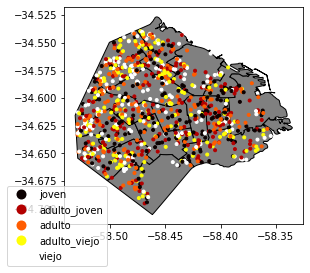

In [24]:
fig, ax = plt.subplots()

geo_comunas.plot(ax=ax, facecolor="gray", edgecolor='black')
geo_arbolado_filtrado.sample(1000).plot(ax=ax, column = "categoria_edad",legend=True, cmap='hot',  marker='.')
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))